Deep Feed forward para identificação de dígitos... parte 1 :importando e analisando o Dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0-rc1


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Vamos ver analisar a primeira imagem

In [3]:
print(x_train.shape)#imagem 28x28

(60000, 28, 28)


In [4]:
print(x_train[0].max(),x_train[0].min())# a imagem tem um só canal entre 0 e 255

255 0


In [5]:
print(len(x_train),len(x_test))

60000 10000


Apresente a quantidade de amostras de cada classe..há balanceamento?

In [6]:
yl=list(y_train)
count=[yl.count(i) for i in range(10)]
count

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [7]:
yt=list(y_test)
count=[yt.count(i) for i in range(10)]
count

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [8]:
import matplotlib.pyplot as plt


5

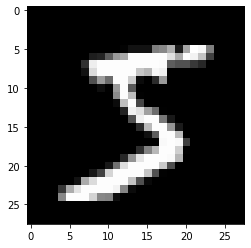

In [9]:
plt.gray()
plt.imshow(x_train[0]) 
y_train[0]

Parte 2 :
a)Transformando os targets (y_train, y_test) em amostras com 10 posições, via one_hot_encoding.

b)Transformando as imagens em um array unidimensional
Com 28x28 elementos. x_train=>x_train1


In [10]:

y_train1=y_train.copy()
y_train1=y_train1.reshape((-1,1))#transformando em mx1


Transformação da imagem 2D em vetor 1D

In [11]:
import numpy as np
l_train1=[]
l_test1=[]
for i in range(len(x_train)):
  l_train1.append(x_train[i].reshape((784,)))
for i in range(len(x_test)):
  l_test1.append(x_test[i].reshape((784,)))
x_train1=np.array(l_train1)
x_test1=np.array(l_test1)
x_train[:4],x_test[:4]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
 

In [12]:
x_train1[0].shape

(784,)

In [13]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_train1=y_train.copy()
y_train1=y_train1.reshape((-1,1))#transformando em mx1
enc.fit(y_train1)
ytr1=enc.transform(y_train1).toarray()
ytr1[:10]#Observe o encoding da amostra de classe 5 (primeira linha)

y_test1=y_test.copy()
y_test1=y_test.reshape((-1,1))#transformando em mx1
enc.fit(y_test1)
yts1=enc.transform(y_test1).toarray()
yts1[:10]#Observe o encoding da amostra de classe 5 (primeira linha)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Parte 3:

a)Criando e treinando modelo

b)Validando o modelo

3)Observando a convergência



In [14]:
tf.random.set_seed(51)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(3000, activation='relu',input_shape=(784,)))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3000)              2355000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1500500   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 3,906,610
Trainable params: 3,906,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(x=x_train1,y=ytr1, validation_data=(x_test1, yts1),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 1.1170 - accuracy: 0.9148 - val_loss: 0.2170 - val_accuracy: 0.9418
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1939 - accuracy: 0.9493 - val_loss: 0.1809 - val_accuracy: 0.9506
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1474 - accuracy: 0.9607 - val_loss: 0.1598 - val_accuracy: 0.9571
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1272 - accuracy: 0.9661 - val_loss: 0.1354 - val_accuracy: 0.9629
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1064 - accuracy: 0.9728 - val_loss: 0.1206 - val_accuracy: 0.9706
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0943 - accuracy: 0.9761 - val_loss: 0.1224 - val_accuracy: 0.9681
Epoch 7/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0878 - accuracy: 0.9774 - val_loss: 0.1575 -